<font size="+2"><p style="text-align: center;"><b> Auswertung Versuch 223 PAP 2.1. </p></font>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import norm

In [3]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

In [4]:
t, x, y = np.loadtxt('Messung.dat', skiprows=8, usecols=(1,2,3), 
                     converters={1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)

OSError: Messung.dat not found.

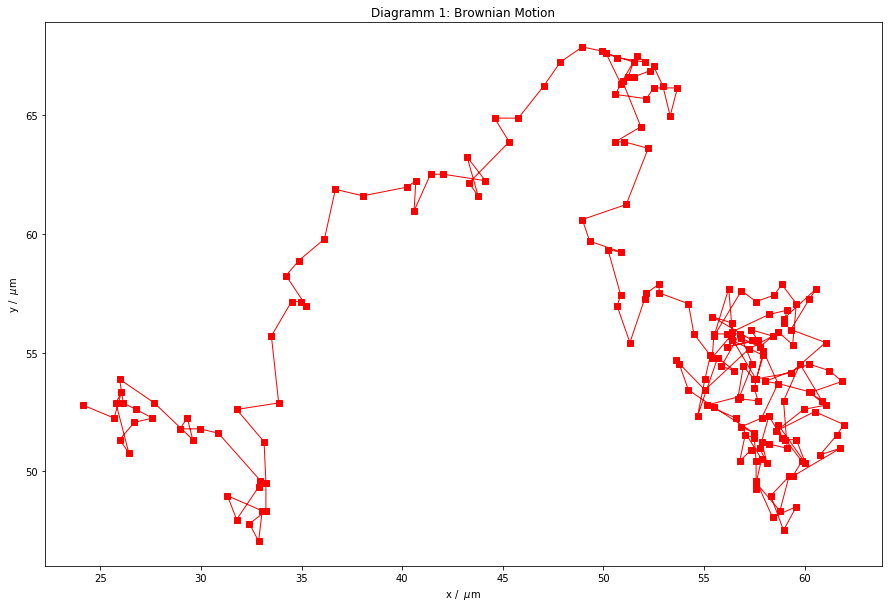

In [22]:
plt.figure(figsize=(15,10))
plt.plot(x, y, marker='s', color='red', linewidth=1)
plt.xlabel('x / '+' $\mu$' +'m')
plt.ylabel('y / '+' $\mu$' +'m')
plt.title('Diagramm 1: Brownian Motion')
plt.savefig('figures/brown1.png', format='png')

In [5]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0
while i < len(t)-1:
    dt = np.append(dt, t[i+1]-t[i])
    dx = np.append(dx, (x[i+1]-x[i])*1e-6)
    dy = np.append(dy, (y[i+1]-y[i])*1e-6)
    i = i + 1
r_squared=dx**2+dy**2

In [6]:
r_squared_mean = np.mean(r_squared)
print("r_squared_mean = ", r_squared_mean)
r_squared_mean_std = np.std(r_squared)/np.sqrt(len(r_squared))
print("r_squared_mean_std = ", r_squared_mean_std)
dt_mean = np.mean(dt)
print("dt_mean = ", dt_mean)
dt_mean_std = np.std(dt)/np.sqrt(len(dt))
print("dt_mean_std = ", dt_mean_std)

r_squared_mean =  1.981265628140703e-12
r_squared_mean_std =  1.2435709448392186e-13
dt_mean =  1.0010150753768845
dt_mean_std =  0.0005053926204569469


In [7]:
T_mean = 295.95
T_error = 1
eta_mean = 9.40e-4
eta_error = 0.25e-4
a_mean = 377.5e-9
a_error = 15e-9

In [8]:
def get_k():
    return 6*np.pi*eta_mean*a_mean*r_squared_mean/(4*T_mean*dt_mean)

def get_k_error():
    return get_k()*np.sqrt((eta_error/eta_mean)**2 + (a_error/a_mean)**2 + (T_error/T_mean)**2 + (dt_mean_std/dt_mean)**2 +
                           (r_squared_mean_std/r_squared_mean)**2)
                    

def get_D():
    return get_k()*T_mean/(6*np.pi*eta_mean*a_mean)

def get_D_error():
    return get_D()*np.sqrt((get_k_error()/get_k())**2 + (T_error/T_mean)**2 + (eta_error/eta_mean)**2 + (a_error/a_mean)**2)

In [9]:
print("k = ", get_k())
print("k_error = ", get_k_error())
print("D = ", get_D())
print("D_error = ", get_D_error())

k =  1.1183292504611035e-23
k_error =  8.832335140707897e-25
D =  4.948141333922349e-13
D_error =  4.5713825180728085e-14


In [10]:
k_mean=get_k()
k_error=get_k_error()
D_mean=get_D()
D_error=get_D_error()

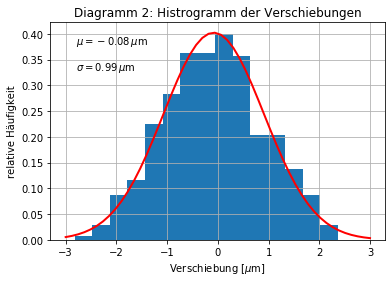

In [11]:
all_data = np.append(dx, dy)*1e6 # distances in micrometer
plt.hist(all_data, bins = 15, density=True)
plt.grid(True)
plt.xlabel("Verschiebung [$\mu$m]")
plt.ylabel("relative Häufigkeit")

mu = np.mean(all_data)
sigma = np.std(all_data)
displacements = np.linspace(-3, 3)
gauss = norm.pdf(displacements, mu, sigma)

plt.plot(displacements, gauss, 'r-', linewidth = 2)
plt.title("Diagramm 2: Histrogramm der Verschiebungen")
plt.text(-2.8, 0.38, "$\mu = %.2f \, \mu$m" % mu)
plt.text(-2.8, 0.33, "$\sigma = %.2f \, \mu$m" % sigma)
#plt.text?
plt.savefig('figures/gauss.png')

In [12]:
def linear(x, m, b):
    return m*x + b

In [13]:
r_cum = np.cumsum(r_squared)
popt, pcov = curve_fit(linear, t[:-1], r_cum)

In [14]:
m = popt[0]
b= popt[1]
print("Offset: b = ", popt[1], " +- ", (pcov[1][1])**0.5)
DD_mean = m/4                ### Doppelbuchstaben stehen für Strich in Auswertung
DD_error = (pcov[0][0])**0.5 / 4
print("Diffusion: D = ", DD_mean, " +- ", DD_error)
kk_mean = 6*np.pi*eta_mean*a_mean*DD_mean/T_mean
kk_error = kk_mean*np.sqrt((eta_error/eta_mean)**2 + (a_error/a_mean)**2 + (T_error/T_mean)**2 + (DD_error/DD_mean)**2)
print("Boltzmann constant: k = ", kk_mean, " +- ", kk_error)

Offset: b =  -1.2347503256702214e-11  +-  8.755892147686636e-13
Diffusion: D =  4.983121241326467e-13  +-  1.8675420936774443e-15
Boltzmann constant: k =  1.1262350581146286e-23  +-  5.41492430875182e-25


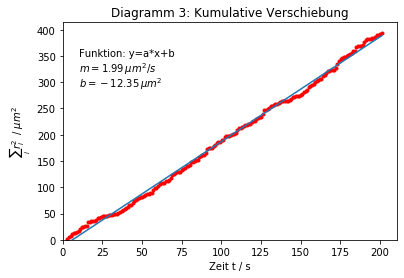

In [15]:
plt.plot(t[:-1], r_cum*1e12, marker = '.', color = 'red', linestyle = 'none')
plt.xlabel('Zeit t / s')
plt.ylabel('$\sum_i r_i^2\,$ / $\mu m^2$')
plt.title('Diagramm 3: Kumulative Verschiebung')
plt.xlim(left = 0)
plt.ylim(bottom = 0)
plt.plot(t[:-1], linear(t[:-1], *popt)*1e12)
plt.text(+10, 350, "Funktion: y=a*x+b")
plt.text(+10, 320, "$m= %.2f \, \mu m^2/s$" % (m*1e12))
plt.text(+10, 290, "$b = %.2f \, \mu m^2$" % (b*1e12))
plt.savefig('figures/kumulativ.png')

In [16]:
print(1.381e-23/k_mean)
print(1.381e-23/kk_mean)

1.2348778317571445
1.22620938679698


In [17]:
# Vergleich mit Literaturwert
print(abs((k_mean - 1.381e-23)/k_error))
print(abs((kk_mean - 1.381e-23)/kk_error))

2.973967193888024
4.704866169109879


In [18]:
#Verlgeich untereinader
k_diff=k_mean-kk_mean
k_diff_error=np.sqrt(k_error**2+kk_error**2)
print(abs(k_diff/k_diff_error))

0.07631019172141727


In [19]:
D_diff=D_mean-DD_mean
D_diff_error=np.sqrt(D_error**2+DD_error**2)
print(abs(D_diff/D_diff_error))

0.07645554432809809
